In [ ]:
https://analyticsindiamag.com/complete-tutorial-on-image-transformations-with-opencv/

In [ ]:
!ls ~/Pictures/*.jpg

In [ ]:
IMAGE="/home/jack/Pictures/yhnO0CFTa2Uaq5DRq3XM--1--2fovu.jpg"

In [1]:
import glob
import random
IMAGE= random.choice(glob.glob("/home/jack/Pictures/*.jpg"))
print(IMAGE)

/home/jack/Pictures/KzBvGdHMVQF8jQkEn2Ae--1--m53du.jpg


In [2]:
import numpy as np
import cv2 as cv
img = cv.imread(IMAGE)
assert img is not None, "file could not be read, check with os.path.exists()"
res = cv.resize(img,None,fx=.2, fy=.2, interpolation = cv.INTER_CUBIC)
#OR
#height, width = img.shape[:2]
#res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)
cv.imwrite('demo001.jpg', res)

True

(205, 205)


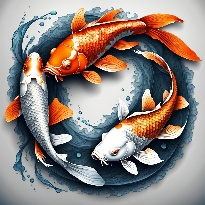

In [3]:
from PIL import Image
im=Image.open("demo001.jpg")
print (im.size)
im



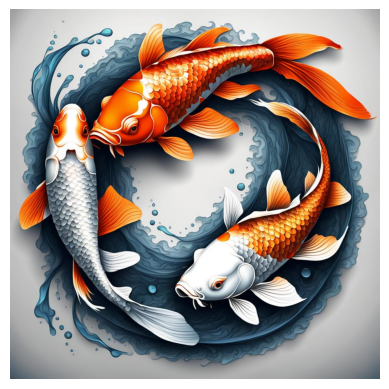

In [4]:
import matplotlib.pyplot as plt
import cv2

# Read your image using OpenCV
img = cv2.imread(IMAGE)

# OpenCV reads images in BGR format; convert it to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()


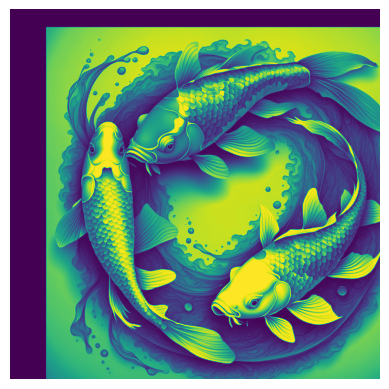

In [5]:
import numpy as np
import cv2 as cv
img = cv.imread(IMAGE, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))
# Display the image using matplotlib
plt.imshow(dst)
plt.axis('off')  # Turn off axis labels
plt.show()

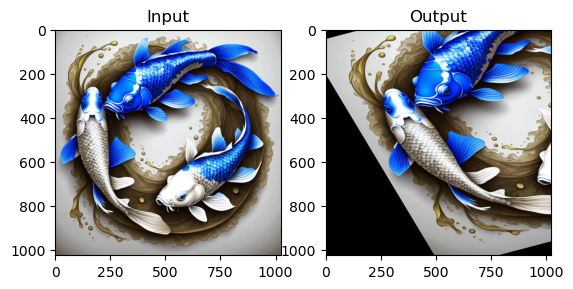

In [6]:
img = cv.imread(IMAGE)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

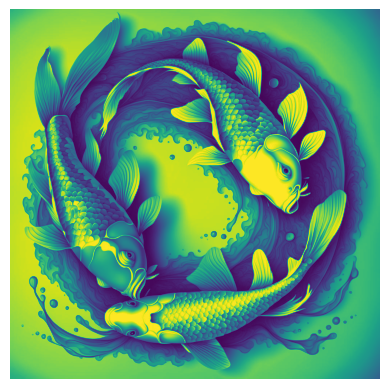

In [9]:
img = cv.imread(IMAGE, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols = img.shape
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))
# Display the image using matplotlib
plt.imshow(dst)
plt.axis('off')  # Turn off axis labels
plt.show()

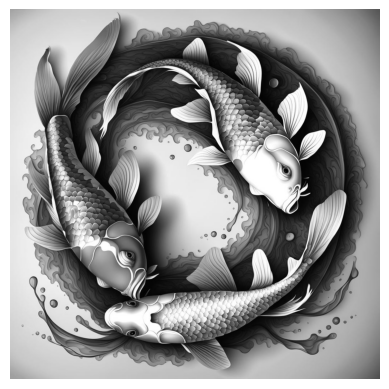

In [12]:
_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Display the image using matplotlib
plt.imshow(_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

In [15]:
import cv2
import os

image_folder = '/home/jack/Pictures/'
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [17]:
!vlc video.avi


VLC media player 3.0.11.1 Vetinari (revision 3.0.11.1-0-g52483f3ca2)
[00000000008d3180] main libvlc: Running vlc with the default interface. Use 'cvlc' to use vlc without interface.
QObject::~QObject: Timers cannot be stopped from another thread


In [18]:
import cv2
import numpy as np
import os

image_folder = '/home/jack/Pictures/'
video_file = 'fish.mp4'
image_size = (512, 512)
fps = 24

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
images.sort()

out = cv2.VideoWriter(video_file, cv2.VideoWriter_fourcc(*'MP4V'), fps, image_size)

img_array = []
for filename in images:
    img = cv2.imread(os.path.join(image_folder, filename))
    img_array.append(img)
    out.write(img)

out.release()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [22]:
import os
import cv2

image_folder = '/home/jack/Pictures/'
video_file = 'output_video.mp4'
fps = 3  # Adjust the frames per second as needed
image_size = (width, height)  # Set the width and height of the images

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
images.sort()

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  
# Use 'mp4v' codec directly
out = cv2.VideoWriter(video_file, fourcc, fps, image_size)

for image in images:
    img_path = os.path.join(image_folder, image)
    frame = cv2.imread(img_path)
    out.write(frame)

out.release()


In [23]:
!vlc output_video.mp4

VLC media player 3.0.11.1 Vetinari (revision 3.0.11.1-0-g52483f3ca2)
[0000000000737180] main libvlc: Running vlc with the default interface. Use 'cvlc' to use vlc without interface.
libva info: VA-API version 0.39.0
libva info: va_getDriverName() returns 0
libva info: Trying to open /usr/lib/x86_64-linux-gnu/dri/nouveau_drv_video.so
libva error: /usr/lib/x86_64-linux-gnu/dri/nouveau_drv_video.so has no function __vaDriverInit_0_32
libva info: va_openDriver() returns -1
[00007fe9c0001840] glconv_vaapi_x11 gl error: vaInitialize: unknown libva error
libva info: VA-API version 0.39.0
libva info: va_getDriverName() returns 0
libva info: Trying to open /usr/lib/x86_64-linux-gnu/dri/gallium_drv_video.so
libva info: va_openDriver() returns -1
[00007fe9c0001840] glconv_vaapi_drm gl error: vaInitialize: unknown libva error
libva info: VA-API version 0.39.0
libva info: va_getDriverName() returns 0
libva info: Trying to open /usr/lib/x86_64-linux-gnu/dri/gallium_drv_video.so
libva info: va_openDr

[00007fe9c071a460] chain filter error: Too high level of recursion (3)
[00007fe9c06e7a20] main filter error: Failed to create video converter
[00007fe9c071a460] chain filter error: Too high level of recursion (3)
[00007fe9c06e7a20] main filter error: Failed to create video converter
[00007fe9c071a460] chain filter error: Too high level of recursion (3)
[00007fe9c06e7a20] main filter error: Failed to create video converter
[00007fe9c071a460] chain filter error: Too high level of recursion (3)
[00007fe9c06e7a20] main filter error: Failed to create video converter
[00007fe9c071a460] chain filter error: Too high level of recursion (3)
[00007fe9c06e7a20] main filter error: Failed to create video converter
[00007fe9c06e9210] main filter error: Failed to create video converter
[00007fe9cc000de0] main video output error: Failed to create video converter
[00007fe9cc000de0] main video output error: Failed to compensate for the format changes, removing all filters
[00007fe9c8c0bd00] avcodec decod

QObject::~QObject: Timers cannot be stopped from another thread
